# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет


1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку square, равную width * height или perimeter Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
 [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

In [61]:
import pandas as pd

df = pd.read_csv('data/raw/nba2k20-full.csv')
df.head(5)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


Text(0, 0.5, 'Number of players')

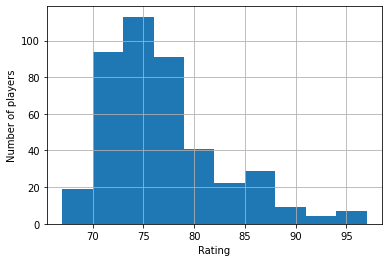

In [62]:
import matplotlib.pyplot as plt

df['rating'].hist(bins=10)

plt.xlabel("Rating")
plt.ylabel("Number of players")

In [63]:
import pandas as pd

def write_array(arr: pd.Series, path: str) -> None:
    arr = arr.tolist()
    with open(path, 'w') as f:
        f.write('\n'.join([str(x) for x in arr]))
        
write_array(df['rating'], 'data/processed/NBA_rating.txt')
write_array(df['salary'], 'data/processed/NBA_salary.txt')

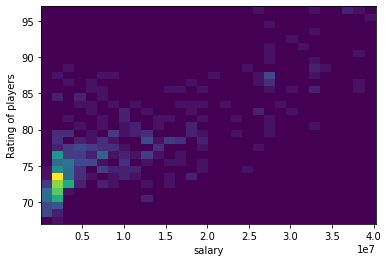

In [89]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist2d([int(i[1:]) for i in df['salary']], df['rating'], bins=30)
plt.xlabel("salary")
plt.ylabel("Rating of players")
plt.show()

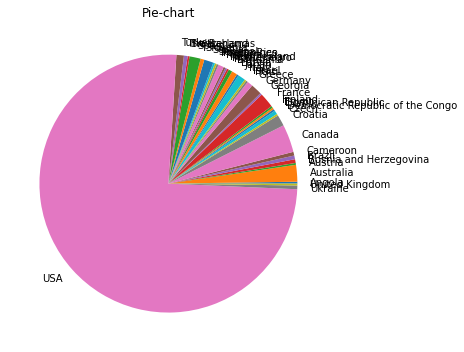

In [81]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

unique, counts = np.unique(df['country'], return_counts=True)

ax.pie(counts, labels = unique)
ax.set_title('Pie-chart')

fig.tight_layout()

# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

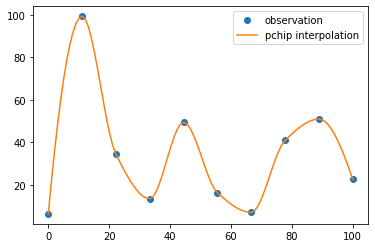

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import pchip_interpolate
from numpy.polynomial.polynomial import Polynomial

N = 10
maxNum = 100
x_observed, y_observed = np.linspace(0, maxNum, N), np.random.rand(N) * maxNum

x = np.linspace(min(x_observed), max(x_observed), num=100)
y = pchip_interpolate(x_observed, y_observed, x)
plt.plot(x_observed, y_observed, "o", label="observation")
plt.plot(x, y, label="pchip interpolation")
plt.legend()
plt.show()

'''
class PchipInterpolator(CubicHermiteSpline):
    r"""PCHIP 1-D monotonic cubic interpolation.
    ``x`` and ``y`` are arrays of values used to approximate some function f,
    with ``y = f(x)``. The interpolant uses monotonic cubic splines
    to find the value of new points. (PCHIP stands for Piecewise Cubic
    Hermite Interpolating Polynomial, Кусочно-кубический
     Интерполирующий многочлен Эрмита).
    """
    def __init__(self, x, y, axis=0, extrapolate=None):
        x, _, y, axis, _ = prepare_input(x, y, axis)
        xp = x.reshape((x.shape[0],) + (1,)*(y.ndim-1))
        dk = self._find_derivatives(xp, y)
        super().__init__(x, y, dk, axis=0, extrapolate=extrapolate)
        self.axis = axis

    @staticmethod
    def _edge_case(h0, h1, m0, m1):
        # one-sided three-point estimate for the derivative
        d = ((2*h0 + h1)*m0 - h0*m1) / (h0 + h1)

        # try to preserve shape
        mask = np.sign(d) != np.sign(m0)
        mask2 = (np.sign(m0) != np.sign(m1)) & (np.abs(d) > 3.*np.abs(m0))
        mmm = (~mask) & mask2

        d[mask] = 0.
        d[mmm] = 3.*m0[mmm]

        return d

    @staticmethod
    def _find_derivatives(x, y):
        # Determine the derivatives at the points y_k, d_k, by using
        #  PCHIP algorithm is:
        # We choose the derivatives at the point x_k by
        # Let m_k be the slope of the kth segment (between k and k+1)
        # If m_k=0 or m_{k-1}=0 or sgn(m_k) != sgn(m_{k-1}) then d_k == 0
        # else use weighted harmonic mean:
        #   w_1 = 2h_k + h_{k-1}, w_2 = h_k + 2h_{k-1}
        #   1/d_k = 1/(w_1 + w_2)*(w_1 / m_k + w_2 / m_{k-1})
        #   where h_k is the spacing between x_k and x_{k+1}
        y_shape = y.shape
        if y.ndim == 1:
            # So that _edge_case doesn't end up assigning to scalars
            x = x[:, None]
            y = y[:, None]

        hk = x[1:] - x[:-1]
        mk = (y[1:] - y[:-1]) / hk

        if y.shape[0] == 2:
            # edge case: only have two points, use linear interpolation
            dk = np.zeros_like(y)
            dk[0] = mk
            dk[1] = mk
            return dk.reshape(y_shape)

        smk = np.sign(mk)
        condition = (smk[1:] != smk[:-1]) | (mk[1:] == 0) | (mk[:-1] == 0)

        w1 = 2*hk[1:] + hk[:-1]
        w2 = hk[1:] + 2*hk[:-1]

        # values where division by zero occurs will be excluded
        # by 'condition' afterwards
        with np.errstate(divide='ignore'):
            whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)

        dk = np.zeros_like(y)
        dk[1:-1][condition] = 0.0
        dk[1:-1][~condition] = 1.0 / whmean[~condition]

        # special case endpoints, as suggested in
        # Cleve Moler, Numerical Computing with MATLAB, Chap 3.6 (pchiptx.m)
        dk[0] = PchipInterpolator._edge_case(hk[0], hk[1], mk[0], mk[1])
        dk[-1] = PchipInterpolator._edge_case(hk[-1], hk[-2], mk[-1], mk[-2])

        return dk.reshape(y_shape)
'''
print()

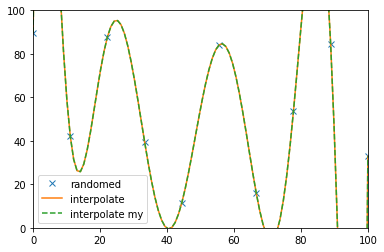

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

N = 10
maxNum = 100
x_observed, y_observed = np.linspace(0, maxNum, N), np.random.rand(N) * maxNum
plt.axis((0,maxNum,0,maxNum))
plt.plot(x_observed, y_observed, "x", label="randomed")

def getY(xi: float, coef: List[Union[int, float]]) -> float:
    y = 0.0
    for i in range(len(coef)):
        y += (coef[len(coef) - i - 1] * xi**i)
    return y

def mul_reduced(left: List[Union[int, float]], coef: float, factor: float) -> List[float]:
    res = [i for i in left] + [0]
    for i in range(len(left)):
        res[i + 1] += left[i] * coef
    return [i / factor for i in res]

def lagrange_my(x: List[Union[int, float]], 
                y: List[Union[int, float]]) -> List[float]:
    M = len(x)
    coefs = [0] * M
    for j in range(M):
        pt = [y[j]]
        for k in range(M):
            if k != j:
                factor = x[j]-x[k]
                pt = mul_reduced(pt, -x[k], factor)
        coefs = np.add(coefs, pt) 
    return coefs

poly = lagrange(x_observed, y_observed)
x_line = np.linspace(0,100,100)
y_line = [getY(xi, Polynomial(poly).coef) for xi in x_line]

poly_my = lagrange_my(x_observed, y_observed)
y_line_my = [getY(xi, poly_my) for xi in x_line]

plt.plot(x_line, y_line, label="interpolate")
plt.plot(x_line, y_line_my, label="interpolate my", linestyle = 'dashed')
plt.legend()
plt.show()


# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

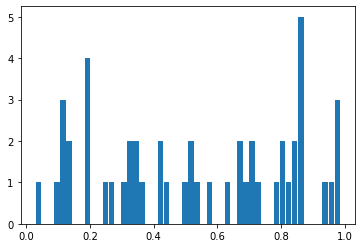

In [95]:
# Пример гистограммы с помощью plt.hist()
import numpy as np
import matplotlib.pyplot as plt

array = np.random.rand(50)
#array = [1,1,2,3,4,1,2,3,4]

value_counts, bins_names, visual_figure = plt.hist(array, 
                                                   bins=len(set(array)), 
                                                   rwidth=0.9)

# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
#print('Значения колонок:', value_counts)
#print('Названия колонок:', bins_names)

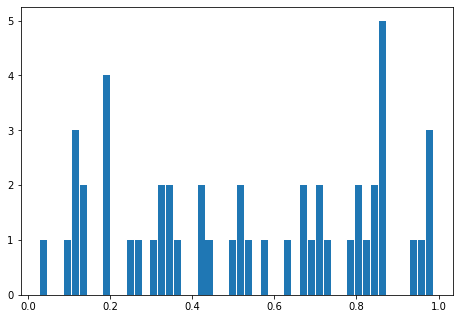

In [96]:
from typing import List, Tuple, Union
import numpy as np

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    minimum, maximum = min(array), max(array)
    x = [minimum + (i * (maximum - minimum) / bins) for i in range(bins + 1)]
    y = get_stat(array, bins, x)
    return y, x[1:]

def get_stat(array: List[Union[int, float]], 
             bins: int, x: List[float]) -> List[float]:
    eps = 1e-8
    stat = [0 for _ in range(bins)]
    for i in range(bins):
        for j in array:
            if ((x[i] - eps) < j and j < (x[i + 1] + eps)):
                stat[i] += 1
    return stat

value_counts2, bins_names2 = fast_hist(array, bins=len(set(array)))
minimum, maximum = min(array), max(array)
width = (maximum - minimum) / len(set(array))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar([i - width / 2 for i in bins_names2], value_counts2, width=width * 0.9)
plt.show()

#print('Значения колонок:', value_counts)
#print('Названия колонок:', bins_names)

658 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


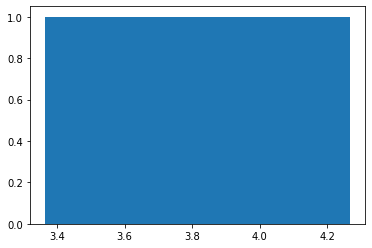

In [91]:
%timeit plt.hist(array, bins=len(set(array)), rwidth=0.9)

In [54]:
%timeit fast_hist(array, bins=len(set(array)))

684 µs ± 5.43 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
